Install core data science packages as per the data science talk (1)

In [1]:
!pip install -q tensorflow numpy pandas dask matplotlib seaborn sklearn

Install private package:

In [4]:
!pip install -q git+https://github.com/schr476/HUGS2021.git#egg=hugs2021 

If you want to run on GPU

In [2]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

If you want to run on TPU

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.106.81.2:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.106.81.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.106.81.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
from hugs2021 import test
test.hello_hugs2021()

Hello HUGS2021


Load some data

In [17]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/schr476/HUGS2021/main/data/hugs2021_data.csv'
from numpy import genfromtxt
dataset = genfromtxt(url, delimiter=',')[1000:3000]
print(dataset.shape)

(2000,)


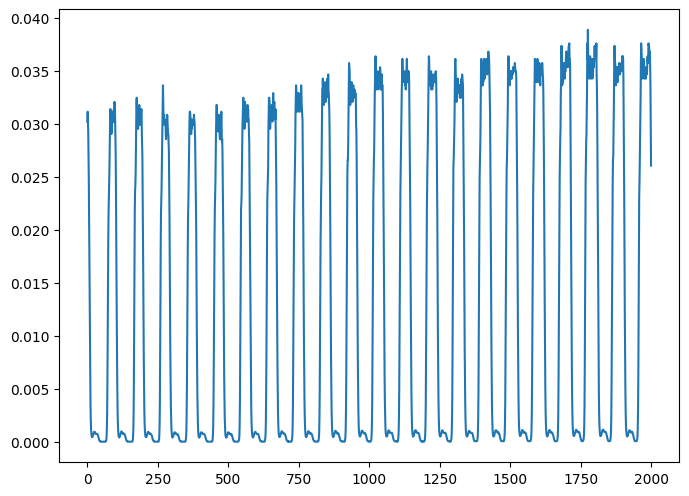

In [18]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,6),dpi=100)
plt.plot(dataset)

Normalize the data

In [8]:
import numpy as np 
from sklearn.preprocessing import StandardScaler as Scaler
dataset = np.reshape(dataset, (-1, 1))
scaler = Scaler()
scaler.fit_transform(dataset)
dataset = scaler.transform(dataset)

Split the data 

In [9]:
print('dataset length: ',len(dataset))
train_size = int(len(dataset) * 0.80)
print('training data length: ',train_size)
test_size = len(dataset) - train_size
print('testing data length: ',test_size)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

dataset length:  1000
training data length:  800
testing data length:  200


Restructure the data for RNN model

In [10]:
import dataprep.preprocessing as prep 
look_back    = 200 
look_forward = 1 ## 1 second (cycle - 15Hz)

X_train, Y_train = prep.create_dataset(train, look_back,look_forward)
X_test, Y_test = prep.create_dataset(test, look_back,look_forward)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (698, 100)
X_test shape: (98, 100)
X_train shape: (698, 100, 1)
X_test shape: (98, 100, 1)


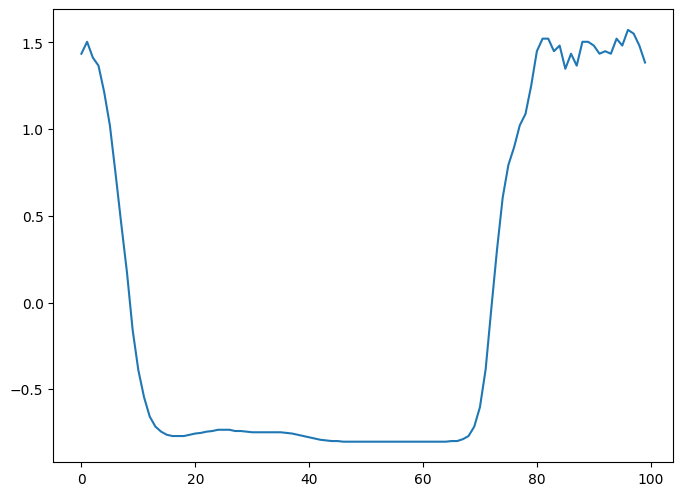

In [11]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,6),dpi=100)
plt.plot(X_train[0,:,:])

Define you ML model and train

In [12]:
import time
import tensorflow.keras as keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=25, verbose=1,mode='auto', baseline=None, restore_best_weights=False)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.85, patience=5, min_lr=1e-6,verbose=1)
# create and fit the LSTM network
units=56
model = keras.Sequential()
model.add(keras.layers.LSTM(units, input_shape=(look_back,1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(units, return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(units))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(look_forward))
opt = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(loss='mae', optimizer=opt)

start_t = time.time()
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=25, shuffle=True, callbacks=[early_stopping,reduce_lr], verbose=0)
print('Training time: ', time.time()-start_t)


Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.008499999810010194.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.007224999601021409.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.00614124946296215.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.005220062122680246.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.004437052784487605.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.003771494748070836.

Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.0032057706150226293.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.0027249050326645374.

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.0023161692777648566.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 0.001968743826728314.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0016734321834519506.
Epoch 00073: early stopping
Training time:  191.56830739974976


Check the loss curve for any overfitting

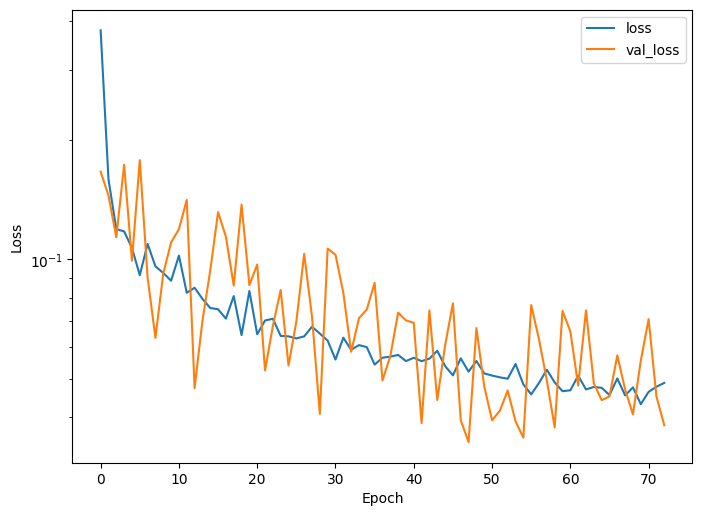

In [13]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,6),dpi=100)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper right')

Make a prediction using the test data

In [14]:
X_in = X_test
Y_in = Y_test
X_pred = model.predict(X_in)
print(X_pred.shape)
mae = keras.losses.MeanAbsoluteError()
train_mae = mae(Y_in,X_pred).numpy()
print(train_mae)

(98, 1)
0.049812566


Compare the true pulse with the predictions

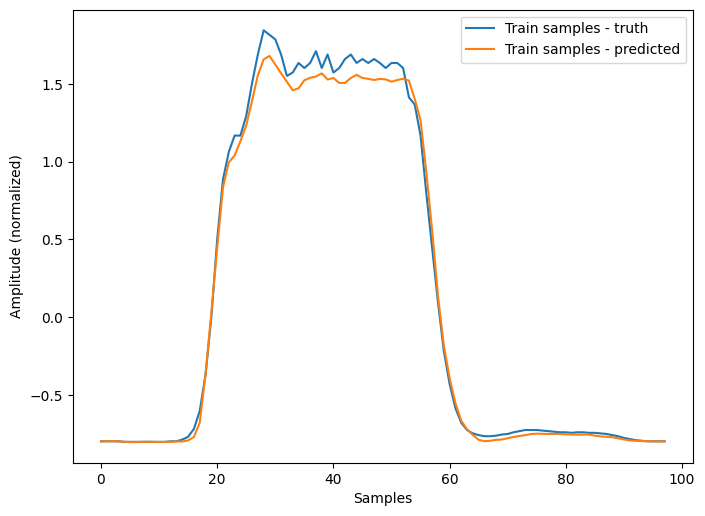

In [15]:
fig= plt.figure(figsize=(8,6),dpi=100)
plt.plot(Y_in.flatten(), label='Train samples - truth')
plt.plot(X_pred.flatten(), label='Train samples - predicted')
plt.xlabel('Samples')
plt.ylabel('Amplitude (normalized)')
plt.legend()

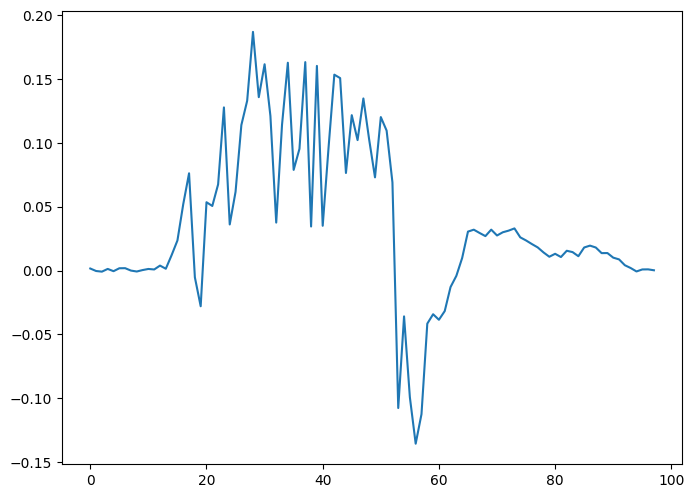

In [16]:
fig= plt.figure(figsize=(8,6),dpi=100)
train_diff= (Y_in.flatten() - X_pred.flatten() )
plt.plot(train_diff)